In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [3]:
df= pd.read_csv('C:/Users/hp/Desktop/mn/Average_Daily_Traffic_Counts.csv')

In [4]:
df

,ID,Traffic Volume Count Location Address,Street,Date of Count,Total Passing Vehicle Volume,Vehicle Volume By Each Direction of Traffic,Latitude,Longitude,Location
0,414,5838 West,Lake St,11/14/2006,7100,East Bound: 3600 / West Bound: 3500,41.887904,-87.771064,"(41.887904, -87.771064)"
1,176,320 East,76th St,03/28/2006,8600,East Bound: 3800 / West Bound: 4800,41.756542,-87.617335,"(41.756542, -87.617335)"
2,715,835 North,Clark St,09/20/2006,16500,South Bound: 16500/ Oneway South Bound,41.897747,-87.631275,"(41.897747, -87.631275)"
3,316,125 East,24th St,03/30/2006,700,East Bound: 400 / West Bound: 300,41.849302,-87.622658,"(41.849302, -87.622658)"
4,1294,2924 East,130th St,08/29/2006,4200,East Bound: 2300 / West Bound: 1900,41.659177,-87.552112,"(41.659177, -87.552112)"
...,...,...,...,...,...,...,...,...,...
1274,1154,806 North,State St,09/21/2006,21100,North Bound: 9900 / South Bound: 11200,41.896924,-87.628206,"(41.896924, -87.628206)"
1275,396,13200 South,Torrence Ave,11/08/2006,15100,North Bound: 7400 / South Bound: 7700,41.655545,-87.559298,"(41.655545, -87.559298)"
1276,762,3121 South,Pulaski Rd,09/14/2006,29500,North Bound: 15400 / South Bound: 14100,41.836244,-87.724337,"(41.836244, -87.724337)"
1277,257,256 East,35th St,03/29/2006,10200,East Bound: 4800 / West Bound: 5400,41.831081,-87.619334,"(41.831081, -87.619334)"


In [5]:
df.shape

(1279, 9)

In [6]:
df.describe()

,ID,Total Passing Vehicle Volume,Latitude,Longitude
count,1279.000000,1279.000000,1279.000000,1279.000000
mean,689.937451,19466.301798,41.849394,-87.670298
std,395.568121,12448.378467,0.083917,0.060891
min,1.000000,700.000000,41.651861,-87.854842
25%,348.500000,11350.000000,41.780249,-87.710013
50%,684.000000,17300.000000,41.871380,-87.662850
75%,1028.500000,24200.000000,41.909196,-87.628631
max,1382.000000,165200.000000,42.017888,-87.529702


In [18]:
df.isnull().sum()

ID                                             0
Traffic Volume Count Location  Address         0
Street                                         0
Date of Count                                  0
Total Passing Vehicle Volume                   0
Vehicle Volume By Each Direction of Traffic    0
Latitude                                       0
Longitude                                      0
Location                                       0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1279 entries, 0 to 1278
Data columns (total 9 columns):
ID                                             1279 non-null int64
Traffic Volume Count Location  Address         1279 non-null object
Street                                         1279 non-null object
Date of Count                                  1279 non-null object
Total Passing Vehicle Volume                   1279 non-null int64
Vehicle Volume By Each Direction of Traffic    1279 non-null object
Latitude                                       1279 non-null float64
Longitude                                      1279 non-null float64
Location                                       1279 non-null object
dtypes: float64(2), int64(2), object(5)
memory usage: 90.1+ KB


In [8]:
df_obj =df.select_dtypes(include=['object'])
df_int = df.select_dtypes(exclude=['object'])

In [9]:
df_obj = df_obj.astype('str')

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_obj = df_obj.apply(le.fit_transform)

In [11]:
df_obj

,Traffic Volume Count Location Address,Street,Date of Count,Vehicle Volume By Each Direction of Traffic,Location
0,891,159,86,253,849
1,511,43,16,265,222
2,1127,95,55,1172,912
3,100,18,18,271,541
4,461,13,45,220,5
...,...,...,...,...,...
1274,1110,225,56,1159,910
1275,116,229,83,1041,1
1276,500,204,52,713,497
1277,403,22,17,316,484


In [16]:
total = pd.concat([df_obj,df_int],axis=1)

In [17]:
total.head()

,Traffic Volume Count Location Address,Street,Date of Count,Vehicle Volume By Each Direction of Traffic,Location,ID,Total Passing Vehicle Volume,Latitude,Longitude
0,891,159,86,253,849,414,7100,41.887904,-87.771064
1,511,43,16,265,222,176,8600,41.756542,-87.617335
2,1127,95,55,1172,912,715,16500,41.897747,-87.631275
3,100,18,18,271,541,316,700,41.849302,-87.622658
4,461,13,45,220,5,1294,4200,41.659177,-87.552112


In [19]:
X = total.drop(['Traffic Volume Count Location  Address'],axis=1)

In [20]:
Y = total['Traffic Volume Count Location  Address']

In [21]:
total.corr()

,Traffic Volume Count Location Address,Street,Date of Count,Vehicle Volume By Each Direction of Traffic,Location,ID,Total Passing Vehicle Volume,Latitude,Longitude
Traffic Volume Count Location Address,1.000000,0.068983,-0.117241,0.094081,-0.012385,-0.040598,0.109478,-0.001213,-0.089115
Street,0.068983,1.000000,0.126147,0.314654,0.231527,0.071821,0.068010,0.235346,-0.052464
Date of Count,-0.117241,0.126147,1.000000,0.008255,0.354966,0.630653,0.044934,0.317228,-0.282555
Vehicle Volume By Each Direction of Traffic,0.094081,0.314654,0.008255,1.000000,0.001999,-0.006642,-0.096820,0.007913,0.132986
Location,-0.012385,0.231527,0.354966,0.001999,1.000000,0.258763,0.076610,0.988156,-0.559349
ID,-0.040598,0.071821,0.630653,-0.006642,0.258763,1.000000,0.134397,0.237559,-0.191170
Total Passing Vehicle Volume,0.109478,0.068010,0.044934,-0.096820,0.076610,0.134397,1.000000,0.074740,-0.182425
Latitude,-0.001213,0.235346,0.317228,0.007913,0.988156,0.237559,0.074740,1.000000,-0.553760
Longitude,-0.089115,-0.052464,-0.282555,0.132986,-0.559349,-0.191170,-0.182425,-0.553760,1.000000


In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=0)

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [27]:
regressor = LinearRegression()  
regressor.fit(x_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
predictions= regressor.predict(x_test)

In [32]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

-117632.3966267765
[ 3.46641904e-01 -2.25889763e+00  1.02518425e-01 -2.72691957e-01
  3.64419111e-02  2.31588252e-03  8.54365412e+02 -9.41897368e+02]


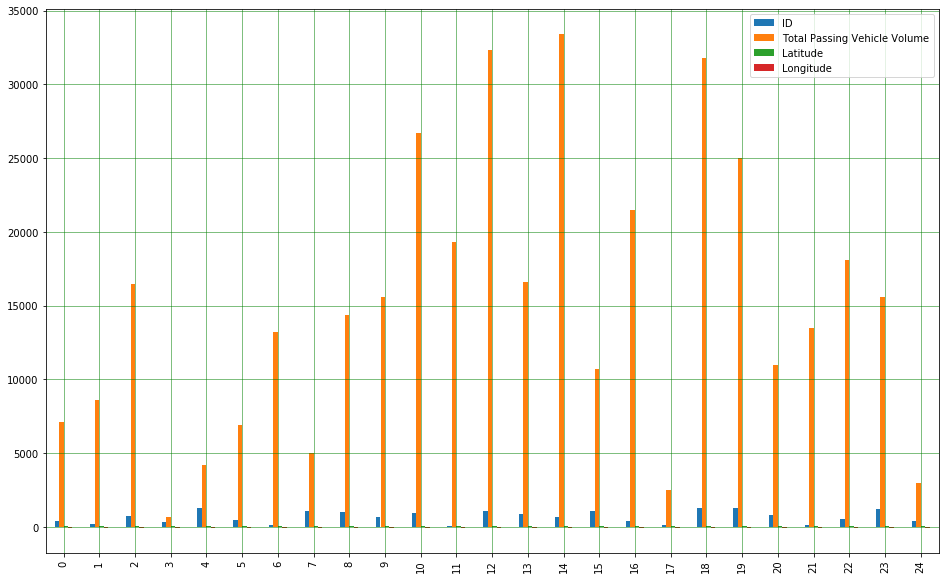

In [39]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [42]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Mean Absolute Error: 292.44066703721705
Mean Squared Error: 114815.9921829926
Root Mean Squared Error: 338.8450858179776


In [47]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
df1 = df.head(10)

In [48]:
df1

,Actual,Predicted
1062,14,432.717183
958,21,632.372025
458,330,636.868488
687,798,527.893708
486,43,583.444402
914,958,861.725024
268,74,587.901829
911,6,647.549664
1058,525,525.444205
667,835,654.843789
